<a href="https://colab.research.google.com/github/KunalBansari/Python-project-of-I3/blob/main/movie_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                  title   type  \
0                                                 Ariel  movie   
1                                   Shadows in Paradise  movie   
2                                          Forrest Gump  movie   
3                                     The Fifth Element  movie   
4                                    My Life Without Me  movie   
...                                                 ...    ...   
9838                                       Black Clover     tv   
9839                          Cells at Work! Code Black     tv   
9840  Shin Tennis no Ouji-sama: Hyoutei vs Rikkai - ...     tv   
9842                                          Concordia     tv   
9843                   The Disappearance of Kimmy Diore     tv   

                            genres  releaseYear      imdbId  \
0           Comedy, Crime, Romance       1988.0   tt0094675   
1             Comedy, Drama, Music       1986.0   tt0092149   
2                 

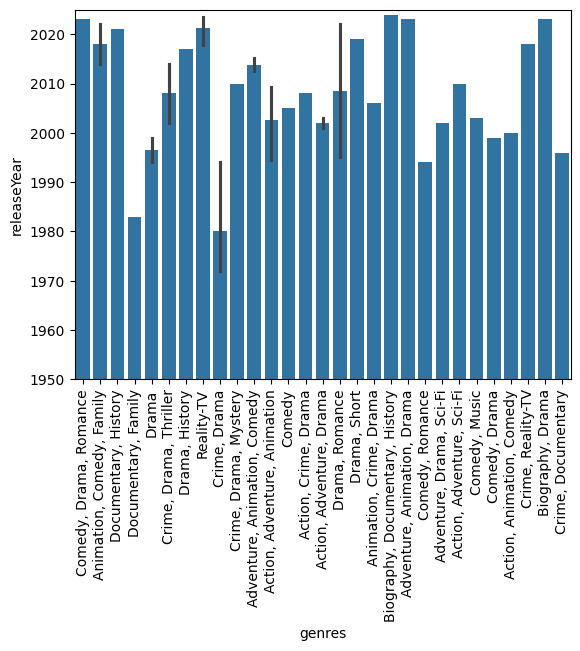

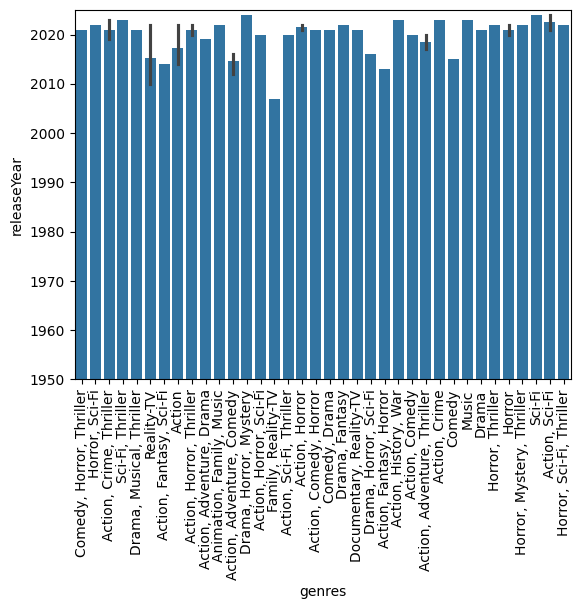

genres
Action, Adventure, Animation       10
Documentary                         8
Animation, Comedy, Drama            6
Animation, Comedy, Romance          5
Action, Animation, Comedy           4
Adventure, Animation, Comedy        4
Comedy                              4
Reality-TV                          3
Biography, Documentary              3
Crime, Documentary                  3
Crime, Drama, Mystery               2
Drama                               2
Adventure, Documentary              2
Animation, Comedy, Fantasy          2
Animation, Drama, Fantasy           2
Biography, Crime, Drama             2
Biography, Documentary, History     2
Drama, Romance                      2
News                                1
Animation, Crime, Drama             1
Action, Animation, Crime            1
Documentary, Short                  1
Documentary, Reality-TV             1
Biography, Drama, History           1
Adventure                           1
Biography, Drama, Sport             1
Crime

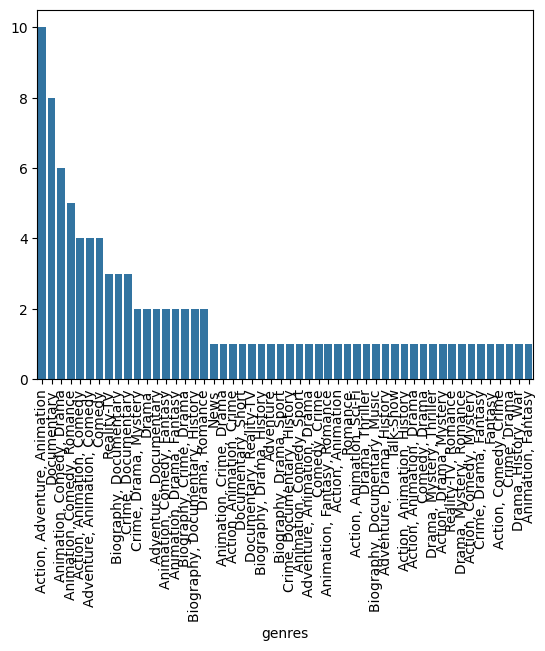

<ipython-input-2-f6d61939bb24>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre 1', y='Adjusted_Avg_Revenue', data=avg_revenue_by_genre, palette='viridis')


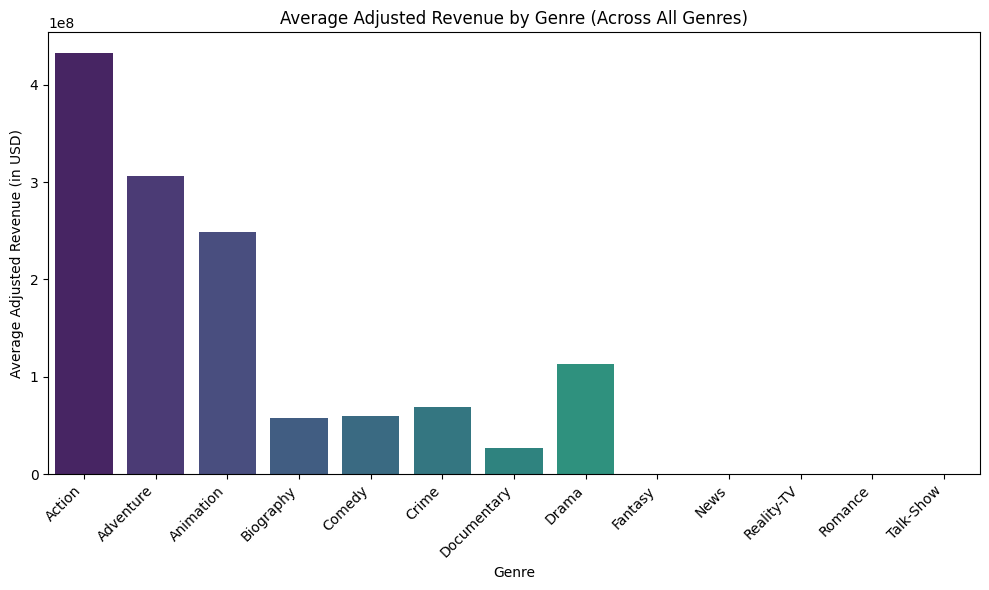

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/data.csv')
df.describe()
df=df.dropna(subset=['title','releaseYear','genres','imdbNumVotes'])
print(df)
p = df.sort_values(by = 'imdbAverageRating', ascending = False)
p
top = p.head(50)
last = p.tail(50)
last = last.drop(columns = ['imdbNumVotes','imdbId'], axis = 1)
top = top.drop(columns = ['imdbNumVotes','imdbId'], axis = 1)
print(last)
print(top)
import matplotlib.pyplot as plt
sns.barplot(data=top, x='genres', y='releaseYear')
plt.xticks(rotation=90, fontsize=10)
plt.ylim(1950, 2025)
plt.yticks(ticks=range(1950, 2030, 10), fontsize=10)
plt.show()
sns.barplot(data=last, x='genres', y='releaseYear')
plt.xticks(rotation=90, fontsize=10)
plt.ylim(1950, 2025)
plt.yticks(ticks=range(1950, 2030, 10), fontsize=10)
plt.show()
top_2024 = p[p['releaseYear'] == 2024]
top_2024=top_2024.head(100)
genre_counts = top_2024['genres'].value_counts()
print(genre_counts)
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=90, fontsize=10)
plt.show()
genre_revenue_mapping = {
    'Action': 500e6,
    'Adventure': 400e6,
    'Drama': 100e6,
    'Comedy': 50e6,
    'Horror': 20e6,
    'Animation': 400e6,
    'Documentary': 25e6,

}

top_2024[['Genre 1', 'Genre 2', 'Genre 3']] = top_2024['genres'].str.split(', ', expand=True)
top_2024.drop('genres', axis=1, inplace=True)

top_2024['Revenue_1'] = top_2024['Genre 1'].map(genre_revenue_mapping)
top_2024['Revenue_2'] = top_2024['Genre 2'].map(genre_revenue_mapping)
top_2024['Revenue_3'] = top_2024['Genre 3'].map(genre_revenue_mapping)

top_2024['Average_Revenue'] = top_2024[['Revenue_1', 'Revenue_2', 'Revenue_3']].mean(axis=1)

top_2024['Adjusted_Avg_Revenue'] = top_2024['Average_Revenue'] * (top_2024['imdbAverageRating'] / 7)

top_2024_exploded = top_2024.explode('Genre 1')
# Calculate average revenue by genre
avg_revenue_by_genre = top_2024_exploded.groupby('Genre 1')['Adjusted_Avg_Revenue'].mean().reset_index()

# Step 8: Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre 1', y='Adjusted_Avg_Revenue', data=avg_revenue_by_genre, palette='viridis')

# Adding labels and title
plt.title('Average Adjusted Revenue by Genre (Across All Genres)')
plt.xlabel('Genre')
plt.ylabel('Average Adjusted Revenue (in USD)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()